##  0.0. BASE

### 0.1 DOWNLOAD

In [186]:
pip install jupyterlab scikit-plot

Note: you may need to restart the kernel to use updated packages.


### 0.2 IMPORTS

In [1]:
import pandas as pd
import numpy as np
import inflection
import seaborn as sns
import scikitplot as skplt

from matplotlib import pyplot as plt
from sklearn import preprocessing as pp
from sklearn import model_selection as ms
from sklearn import ensemble as en
from sklearn import neighbors as nh
from sklearn import linear_model as lm

In [2]:
jupyter_settings()

NameError: name 'jupyter_settings' is not defined

### 0.3 LOADING DATASET

In [3]:
df_raw = pd.read_csv('/home/arquinho/REPOS/health_insurance/pa004_health_insurance_cross_sell/health_insurance_cross-sell/data/raw/train.csv')

In [4]:
df_raw.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## 1.0 DATA DESCRIPTION

In [5]:
df1 = df_raw.copy()

### 1.1 RENAME COLUMNS

In [6]:
df1.columns
cols_old = ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

df1.columns = cols_new

df1.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

### 1.2 DATA DIMENSION

In [7]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Columns: {}'.format( df1.shape[1] ) )

Number of Rows: 381109
Number of Columns: 12


### 1.3 DATA TYPES

In [8]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

### 1.4 DATA NA

In [9]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

### 1.5 DATA DESCRIPTIVE

In [10]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat__attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

In [11]:
#Central Tendency - Mean, Median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

In [12]:
m.head()

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
3,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
4,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871


## 2.0. FEATURE ENGINEERING

In [13]:
df2 = df1.copy()

In [14]:
#vehicle age
df2['vehicle_age'] = df2['vehicle_age'].apply( lambda x: 'over_2_years' if x == '> 2 Years' else
                                              'between_1_2_years' if x == '1-2 Year' else 'below_1_year' )

#vehicle damage
df2['vehicle_damage'] = df2['vehicle_damage'].apply( lambda x: 1 if x == 'Yes' else 0)

## 3.0. DATA FILTERING

In [15]:
df3 = df2.copy()

## 4.0. EDA

In [16]:
df4 = df3.copy()

### 4.1 UNIVARIATE ANALYSIS

In [17]:
df4.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

<AxesSubplot:xlabel='response', ylabel='age'>

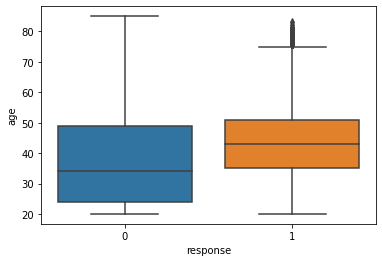

In [18]:
#age
sns.boxplot(x='response', y='age', data=df4)

<AxesSubplot:xlabel='age', ylabel='Count'>

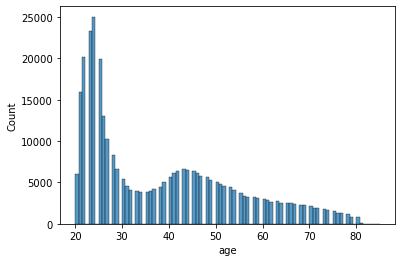

In [19]:
aux1 = df4.loc[df4['response'] ==0, 'age']
sns.histplot( aux1 )

<AxesSubplot:xlabel='age', ylabel='Count'>

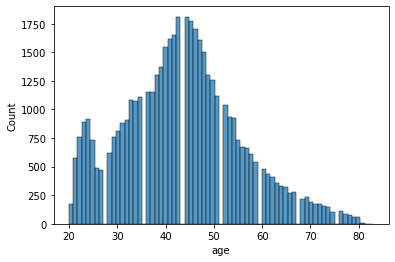

In [20]:
aux1 = df4.loc[df4['response'] ==1, 'age']
sns.histplot( aux1 )

In [21]:
#annual_premium

<AxesSubplot:xlabel='response', ylabel='annual_premium'>

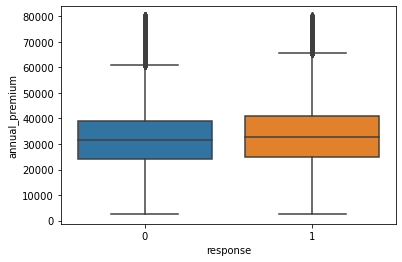

In [22]:
aux = df4[df4['annual_premium'] < 80000]
sns.boxplot( x='response', y='annual_premium', data= aux) #bom para achar outlier

<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

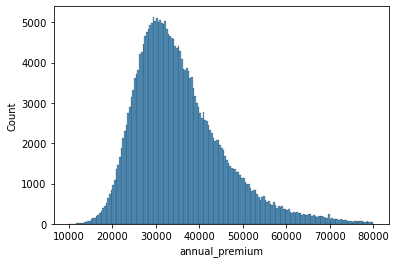

In [23]:
aux = df4[(df4['annual_premium'] > 10000) & (df4['annual_premium'] <80000 )]
aux1 = aux.loc[aux['response'] == 0, 'annual_premium']
sns.histplot( aux1 )

<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

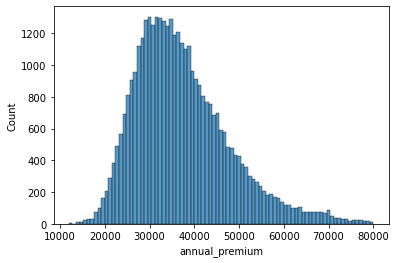

In [24]:
aux1 = aux.loc[aux['response'] == 1, 'annual_premium']
sns.histplot( aux1 )

<AxesSubplot:xlabel='response', ylabel='driving_license'>

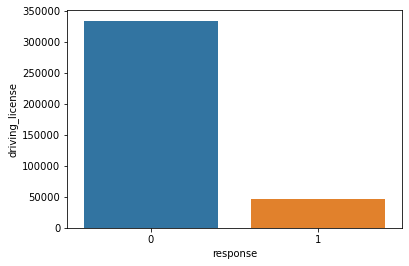

In [25]:
#driving_license
aux = df4[['driving_license', 'response']].groupby( 'response' ).sum().reset_index()
sns.barplot( x='response', y='driving_license', data=aux)

In [26]:
aux['driving_license_perc'] = aux['driving_license'] / aux['driving_license'].sum()
aux

,response,driving_license,driving_license_perc
0,0,333628,0.877283
1,1,46669,0.122717


<AxesSubplot:xlabel='region_code', ylabel='id'>

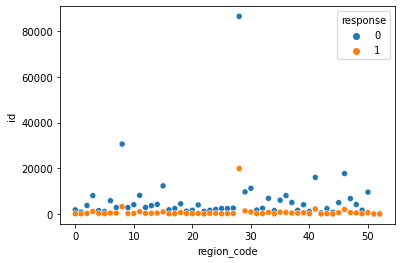

In [27]:
#region_code
aux = df4[['id', 'region_code', 'response']].groupby( ['region_code', 'response'] ).count().reset_index()
sns.scatterplot( x='region_code', y='id', hue='response', data=aux)

In [28]:
#previously_insured
pd.crosstab( df4['previously_insured'], df4['response'] ).apply(lambda x: x / x.sum(), axis=1)

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


In [29]:
#vehicle_age
df4[['vehicle_age', 'response']].value_counts( normalize=True ).reset_index()

,vehicle_age,response,0
0,between_1_2_years,0,0.434285
1,below_1_year,0,0.413488
2,between_1_2_years,1,0.091328
3,over_2_years,0,0.029663
4,below_1_year,1,0.018897
5,over_2_years,1,0.012338


<AxesSubplot:xlabel='response', ylabel='policy_sales_channel'>

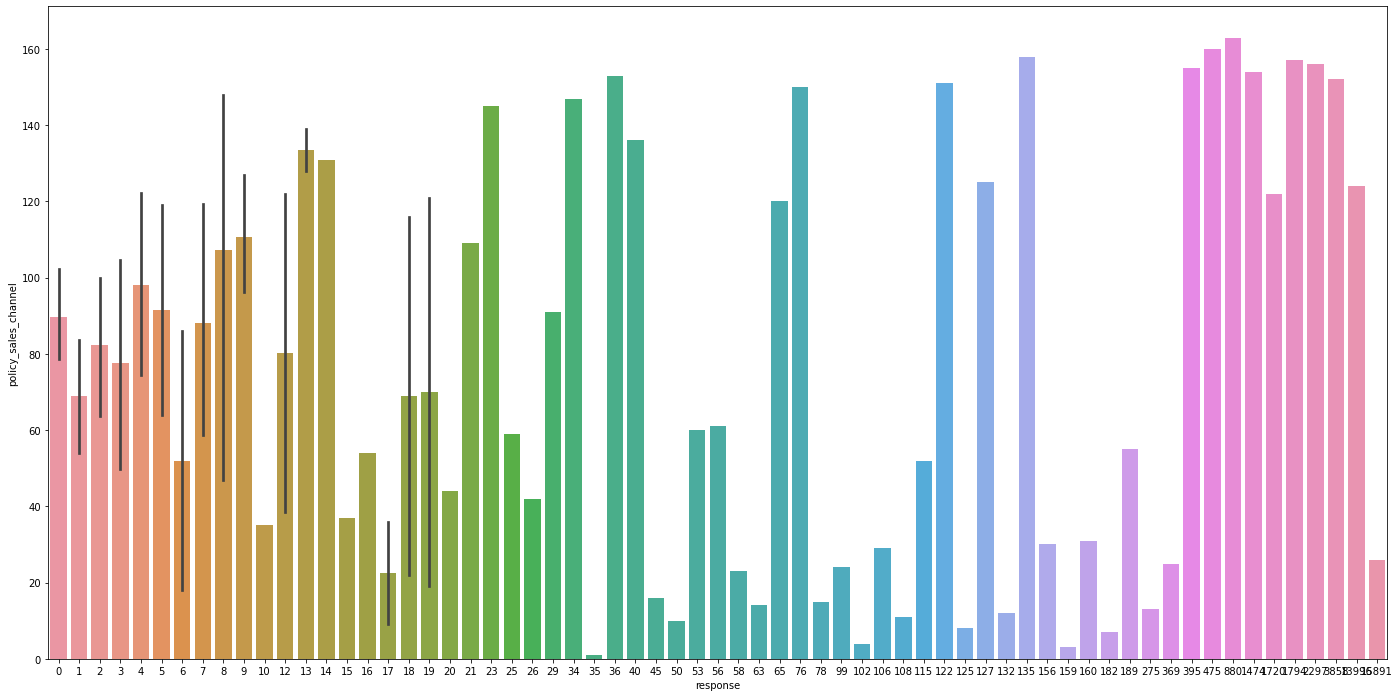

In [30]:
#policy_sales_channel
plt.figure( figsize=(24, 12)) #aumenta tamanmhop do grafo
aux= df4[['policy_sales_channel', 'response']].groupby( 'policy_sales_channel' ).sum().reset_index()
sns.barplot( x='response', y='policy_sales_channel', data=aux)

<AxesSubplot:xlabel='response', ylabel='vintage'>

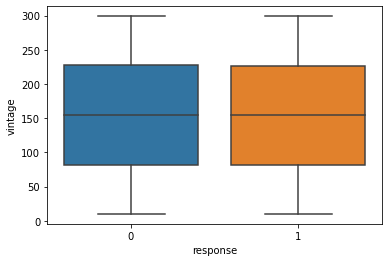

In [31]:
#vintage
sns.boxplot( x='response', y='vintage', data=df4)

<AxesSubplot:xlabel='vintage', ylabel='Count'>

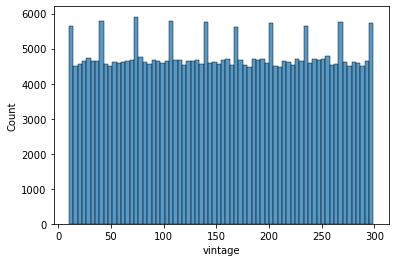

In [32]:
aux1 = df4.loc[df4['response'] == 0, 'vintage']
sns.histplot( aux1 )

<AxesSubplot:xlabel='vintage', ylabel='Count'>

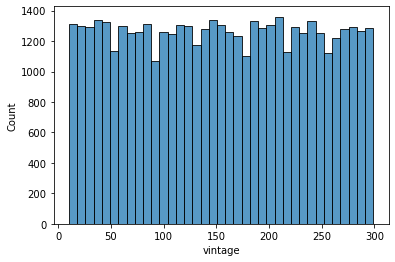

In [33]:
aux1 = df4.loc[df4['response'] == 1, 'vintage']
sns.histplot( aux1 )

## 5.0. DATA PREPARATION

In [34]:
df5 = df4.copy()

In [35]:
X = df4.drop( 'response', axis=1 ) #independet variable
y = df4['response'].copy() #depedency variable that will be predicted

x_train, x_val, y_train, y_val = ms.train_test_split(X, y, test_size=0.20) #teste tera 60% e traiin 80%

df5 = pd.concat( [x_train, y_train], axis=1)

### 5.1 STANDARDIZSATION
media - devio padrao

In [36]:
ss = pp.StandardScaler()

#annual premium
df5['annual_premium'] = ss.fit_transform( df5[['annual_premium']].values )

###  5.2 RESCALING
reescalar os intervalos entre 0 e 1

In [37]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

#age
df5['age'] = mms_age.fit_transform( df5[['age']].values)

#vintage
df5['vintage'] = mms_vintage.fit_transform( df5[['vintage']].values)

###  5.3 ENCODER

In [38]:
#gender
target_encode_gender = df5.groupby( 'gender' )['response'].mean()
df5.loc[:, 'gender'] = df5['gender'].map( target_encode_gender )

#region code - target encond/ferquency/weighted #muitos valores para hot
# usa media da frequencia dos outros valores [ara atribui-los valores]
target_encode_region_code = df5.groupby( 'region_code' )['response'].mean()
df5.loc[:, 'region_code'] = df5['region_code'].map( target_encode_region_code )

# vehicle age - One Hot / Order enconding/Frequency
df5 = pd.get_dummies(df5, prefix='vehicle_age', columns=['vehicle_age'])
#dummies transforma cat em onr hot. Pessimo quando se tem muitos valores diferrente spois deixa gigante o DF

#policy sales channel - Frequency Encoding/ target
fe_policy_sales_channel = df5.groupby( 'policy_sales_channel' ).size() / len( df5 )
df5.loc[:, 'policy_sales_channel'] = df5['policy_sales_channel'].map( fe_policy_sales_channel )

### 5.4 VALIDATION PREPARATION

In [39]:
#gender
x_val.loc[:, 'gender'] = x_val.loc[:, 'gender'].map( target_encode_gender )

#age
x_val.loc[:, 'age'] = mms_age.transform( x_val[['age']].values )

#region code 
x_val.loc[:, 'region_code'] = x_val.loc[:, 'region_code'].map( target_encode_region_code )

# vehicle age
x_val = pd.get_dummies( x_val, prefix='vehicle_age', columns=['vehicle_age'] )

#annual premium
x_val.loc[:, 'annual_premium'] = ss.transform( x_val[['annual_premium']].values )

#policy sales channel
x_val.loc[:, 'policy_sales_channel'] = x_val['policy_sales_channel'].map( fe_policy_sales_channel )

#vintage
x_val.loc[:, 'vintage'] = mms_vintage.transform( x_val[['vintage']].values )

#fillna
x_val = x_val.fillna(0)

/home/arquinho/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/home/arquinho/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/home/arquinho/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy 

## 6.0. FEATURE SELECTION

In [40]:
df6 = df5.copy()

### 6.1 FEATURE IMPORTANCIA EXTRATREES
boruta retornava poucas variaveis

In [41]:
# model definition
forest = en.ExtraTreesClassifier( n_estimators=250, random_state=0, n_jobs=-1) #mais rapido que o random

#data preparation
x_train_n = df5.drop( ['id', 'response'], axis=1 )
y_train_n = y_train.values
forest.fit( x_train_n, y_train_n )

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature Ranking:
                        feauture  importance
0                        vintage    0.272506
0                 annual_premium    0.244378
0                            age    0.163718
0                    region_code    0.107000
0                 vehicle_damage    0.069026
0           policy_sales_channel    0.060536
0             previously_insured    0.055585
0       vehicle_age_below_1_year    0.014037
0  vehicle_age_between_1_2_years    0.005951
0                         gender    0.004509
0       vehicle_age_over_2_years    0.002254
0                driving_license    0.000500


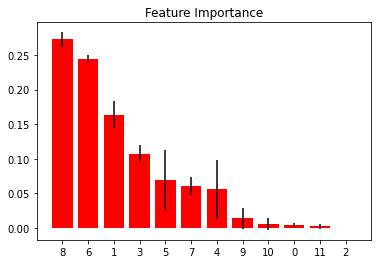

In [42]:
importances = forest.feature_importances_
std = np.std( [tree.feature_importances_ for tree in forest.estimators_], axis=0 )
indices = np.argsort(importances)[::-1]

#printr the feature ranking
print("Feature Ranking:")
df = pd.DataFrame()
for i, j in zip( x_train_n, forest.feature_importances_):
    aux = pd.DataFrame( {'feauture': i, 'importance': j}, index=[0] )
    df = pd.concat( [df,aux], axis=0)
    
print( df.sort_values( 'importance', ascending=False ) )

# Plot the impurity-basew feature importances of forest
plt.figure()
plt.title("Feature Importance")
plt.bar(range(x_train_n.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train_n.shape[1] ), indices )
plt.xlim([ -1, x_train_n.shape[1]] )
plt.show()

## 7.0. MACHINE LEANING

In [43]:
cols_selected = ['annual_premium', 'vintage', 'region_code', 'vehicle_damage', 'previously_insured']

x_train = df5[ cols_selected ]
x_val = x_val[ cols_selected ]

### 7.1. KNN

In [44]:
# model definition
knn_model = nh.KNeighborsClassifier( n_neighbors=7 )

#model training
knn_model.fit( x_train, y_train )

#model prediction - poder de generalizacao
yhat_knn = knn_model.predict_proba( x_val )

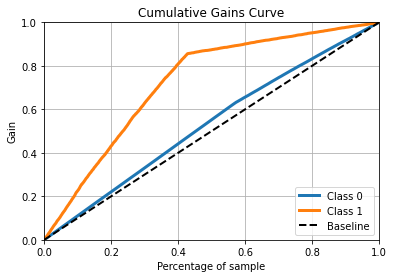

In [45]:
# Accumulative Gain - Metricas de ordenacao visto quie o objetivo e' ordenar os clientes e nao classificar quem tem
#mais probabilidade d comprar o produto
skplt.metrics.plot_cumulative_gain( y_val, yhat_knn);

### 7.2 REGRESSAO LOGISTICA

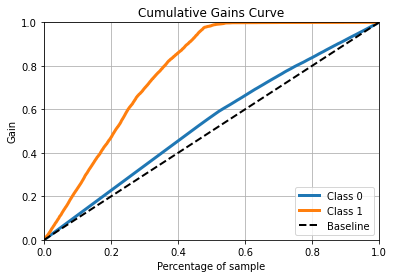

In [46]:
#model definition
lr_model = lm.LogisticRegression( random_state=42 )

#model training
lr_model.fit( x_train, y_train )

#model prediction
yhat_lr = lr_model.predict_proba( x_val )

# accumulative gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_lr);

## 

## 

## 

## 

## 

In [194]:
#ordenacao e o problema